<a href="https://colab.research.google.com/github/LinqingZ/LinqingZ.github.io/blob/main/Resume_Screening.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Problem: 
### 1. Companies often receive thousands of resumes on each job posting. When the company got those resumes they need to do resume screening by machine or by manually in order to know if the resume is fit the position. It is hard that HR needs to screen through thousands of resumes. 
### 2. When companies collect resumes through online advertisements, they want to find candidates most related to the job post from a big pool of resumes. The pain point of finding the right candidates is that they need to manually categorize those resumes based on their skills and experience.
### A solution of using python optical character recognition to read those resumes and get the keyword from the resume by using natural language processing. Then categorize and match them with the job description or roles ideally looking for. This solution also is beneficial for companies who want to look for a good candidate from thousands of resumes online, and categorize resumes to promote the job.  

# Appoaches:
### Resumes are usually pdf files, so it is much easy that us to choose a fast and accurate optical character recognition model to read the text inside the pdf files. (In here we want to assume all resumes are one page, we will also deal with two pages or more resumes when we have more time).
Three major OCR advantages and disadvantages:
* Tesseract OCR is performing well for high-resolution images. Certain morphological operations such as dilation, erosion, OTSU binarization can help increase Tesseract OCR performance.
* EasyOCR is a lightweight model which is giving a good performance for receipt or PDF conversion. It is giving more accurate results with organized texts like pdf files, receipts, and bills.
* Keras-OCR is image specific OCR tool. If text is inside the image and the fonts and colors are unorganized, Keras-ocr gives good results.

### We decided to use the Tesseract OCR since we can convert pdf to image that would be great to read by Tesseract OCR.

### Libary and drive mount

In [1]:
!apt-get update
!sudo apt install tesseract-ocr
!pip install pytesseract

Get:1 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Ign:2 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Hit:4 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Hit:5 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease
Get:6 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Hit:7 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:8 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Hit:10 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Get:11 http://archive.ubuntu.com/ubuntu bionic-backports InRelease [83.3 kB]
Hit:12 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu bionic InRelease
Get:13 http://archive.ubuntu.com/ubuntu bionic-updates/main amd64 Packages [3,519 kB]
Hit:14 http://ppa.launchpad.net

In [2]:
!apt-get install poppler-utils
!pip install pdf2image

Reading package lists... Done
Building dependency tree       
Reading state information... Done
poppler-utils is already the newest version (0.62.0-2ubuntu2.14).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 18 not upgraded.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
import pytesseract
import PIL.Image
from pytesseract import image_to_data, Output
from pdf2image import convert_from_path, convert_from_bytes
from IPython.display import display, Image
import cv2 as cv
import numpy as np
import re

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
# Add a shortcut of the Resume_Data folder to My Drive
file_path = "/content/drive/MyDrive/CISC3440_Project/Resume_Data/"

In [6]:
import os
# list file and directories
file_names = os.listdir(file_path)
print(file_names)

['Software Engineer Resume Example.pdf', 'data-scientist-resume-example.pdf', '1. Data Scientist.pdf', 'java-developer-resume-example.pdf']


In [7]:
resume_path = f"{file_path}{file_names[0]}"
resume_path

'/content/drive/MyDrive/CISC3440_Project/Resume_Data/Software Engineer Resume Example.pdf'

In [8]:
open(resume_path)

<_io.TextIOWrapper name='/content/drive/MyDrive/CISC3440_Project/Resume_Data/Software Engineer Resume Example.pdf' mode='r' encoding='UTF-8'>

### Try to extract the page’s text with PageObject.extractText() but not working

In [38]:
!pip install PyPDF2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [43]:
# importing required modules
import PyPDF2
  
# creating a pdf file object
pdfFileObj = open(resume_path, 'rb')
  
# creating a pdf reader object
pdfReader = PyPDF2.PdfFileReader(pdfFileObj)
  
# # printing number of pages in pdf file
# print(pdfReader.numPages)
  
# creating a page object
pageObj = pdfReader.getPage(0)

print( type(pageObj))
# extracting text from page
print(pageObj.extractText())
  
# closing the pdf file object
# pdfFileObj.close()

<class 'PyPDF2._page.PageObject'>



## Convert PDF to image

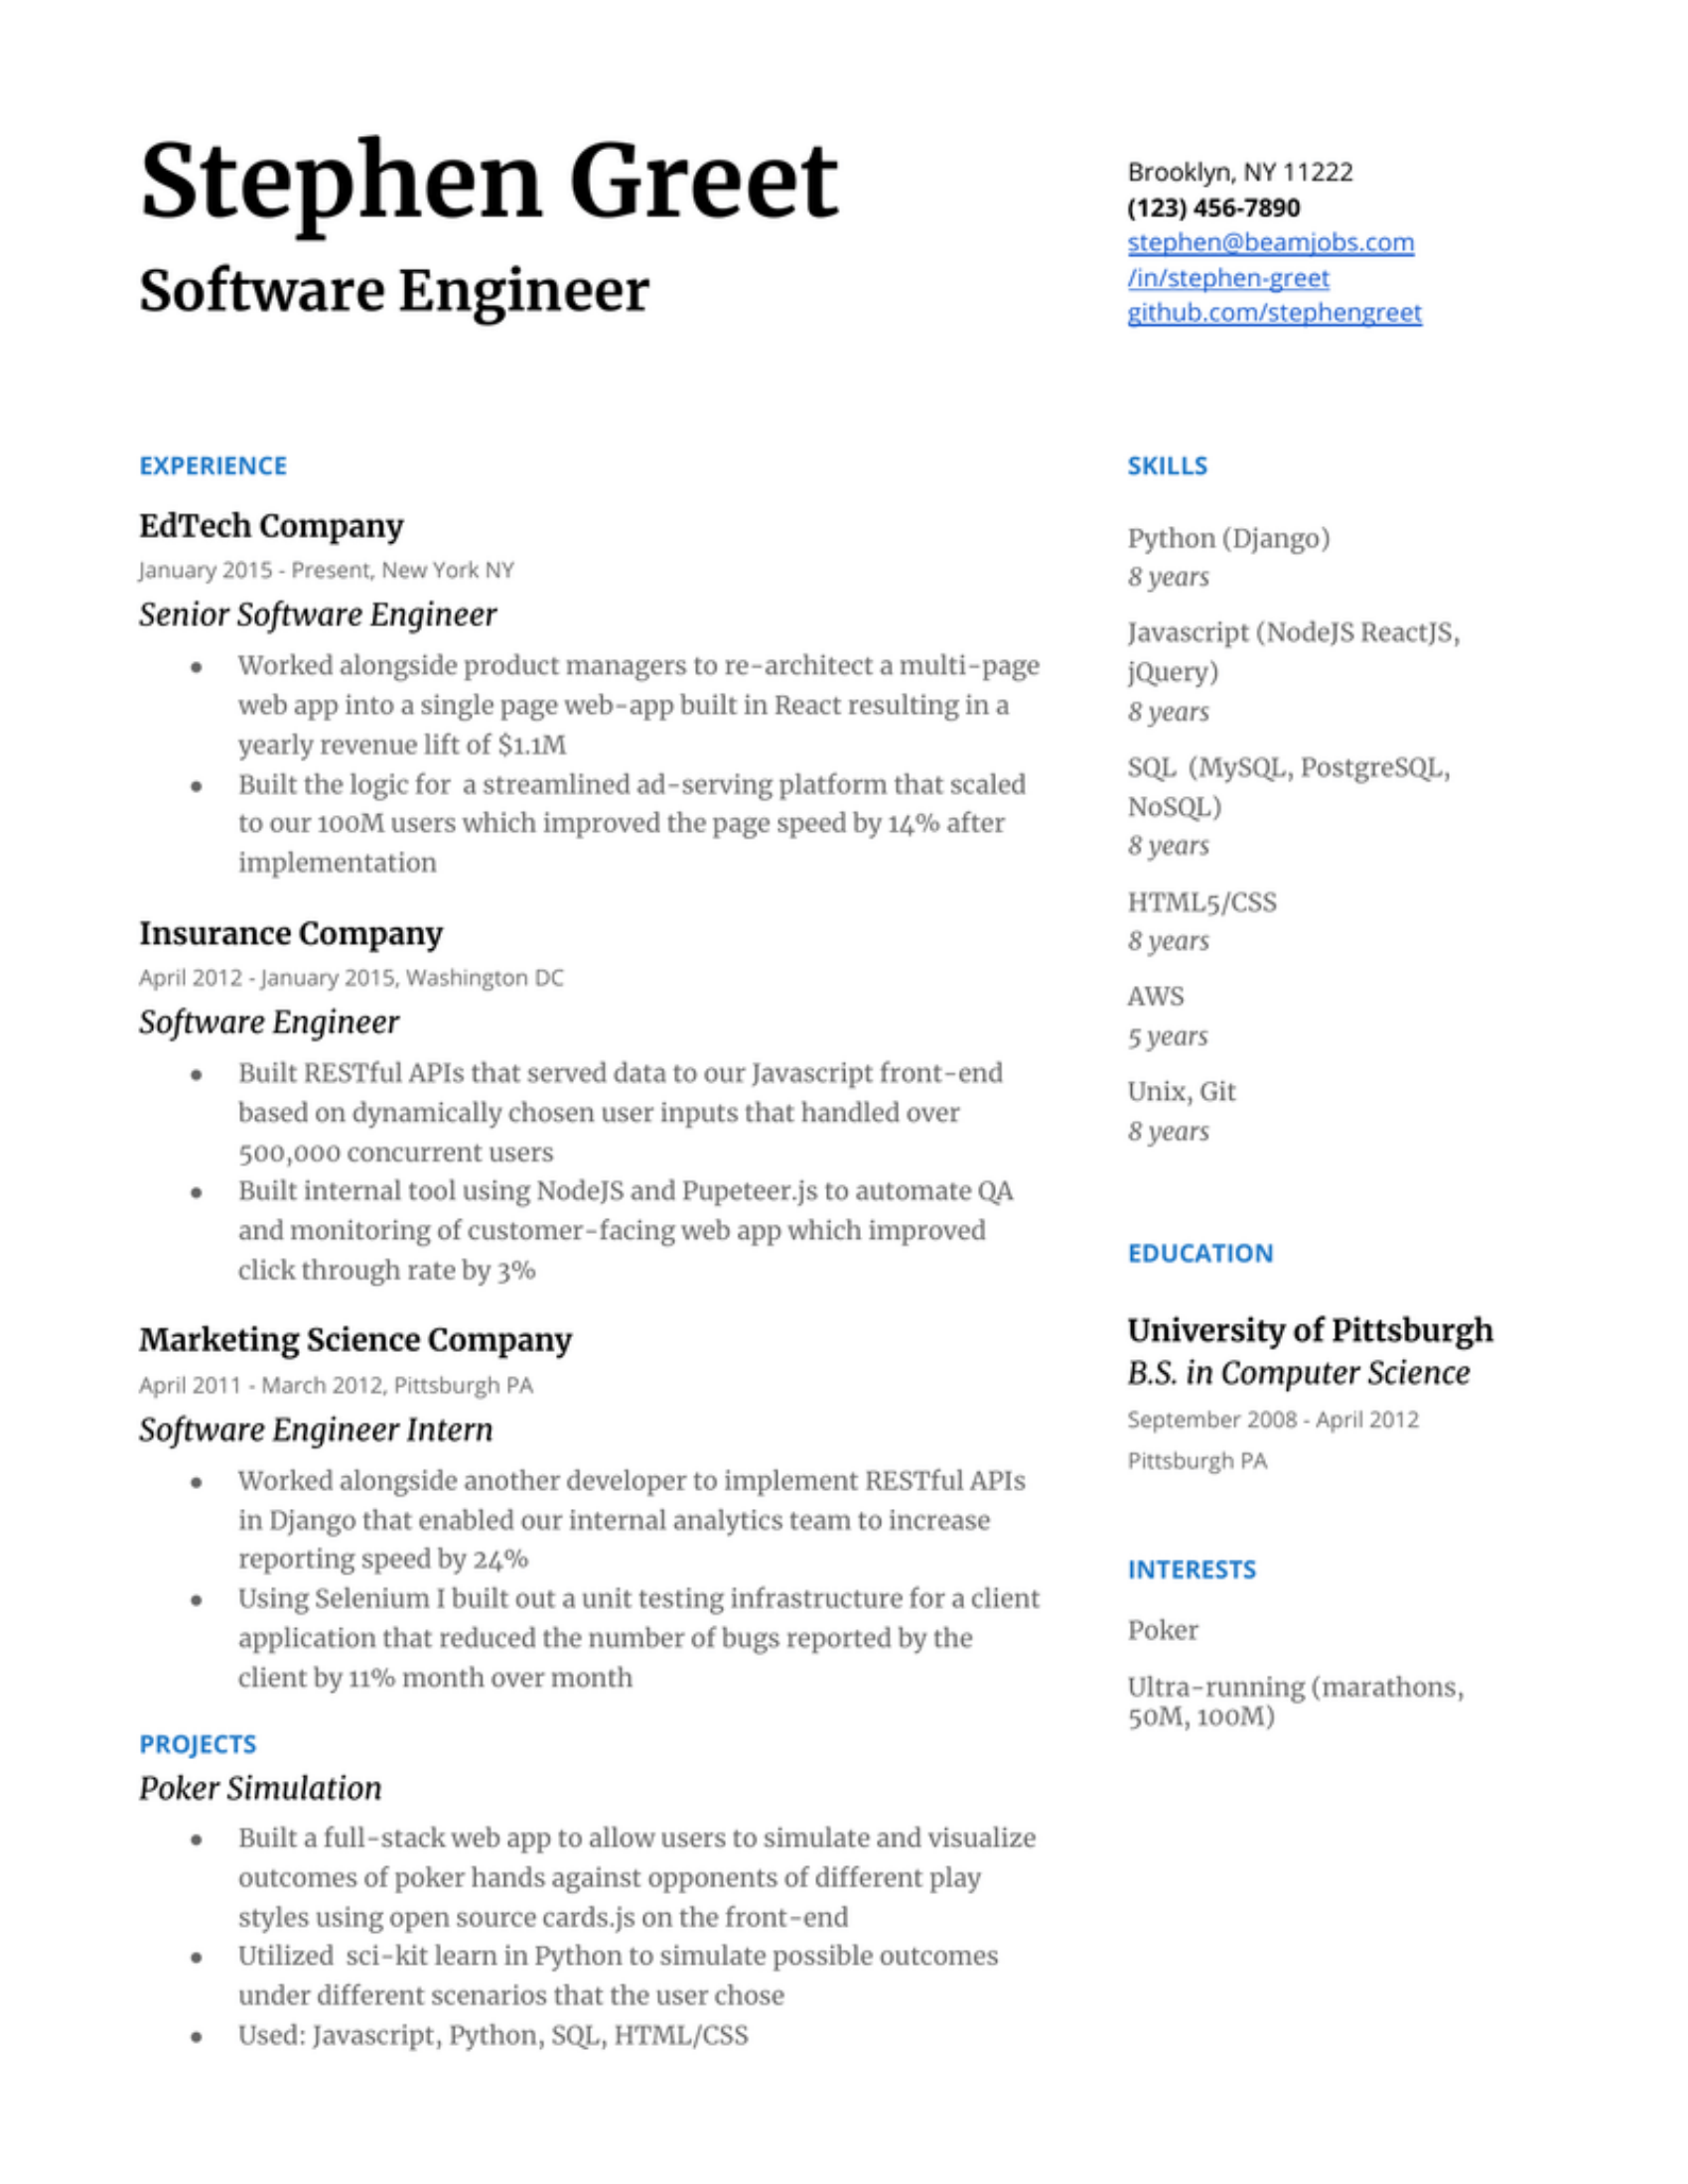

In [9]:
# read resume
resume_image = convert_from_path(resume_path, fmt='PNG')[0]
resume_image

## Extracting text from PDF

In [17]:
resume_text = pytesseract.image_to_data(resume_image, output_type='data.frame') # read the text of image and convert the output into dataframe

In [18]:
resume_text

,level,page_num,block_num,par_num,line_num,word_num,left,top,width,height,conf,text
0,1,1,0,0,0,0,0,0,1700,2200,-1,NaN
1,2,1,1,0,0,0,144,135,701,108,-1,NaN
2,3,1,1,1,0,0,144,135,701,108,-1,NaN
3,4,1,1,1,1,0,144,135,701,108,-1,NaN
4,5,1,1,1,1,1,144,135,403,108,96,Stephen
...,...,...,...,...,...,...,...,...,...,...,...,...
419,5,1,22,1,1,1,1137,1688,178,28,91,Ultra-running
420,5,1,22,1,1,2,1322,1688,151,25,96,"(marathons,"
421,4,1,22,1,2,0,1138,1718,145,25,-1,NaN
422,5,1,22,1,2,1,1138,1719,60,24,96,"50M,"


### Visualize the read text on image

<class 'numpy.ndarray'>


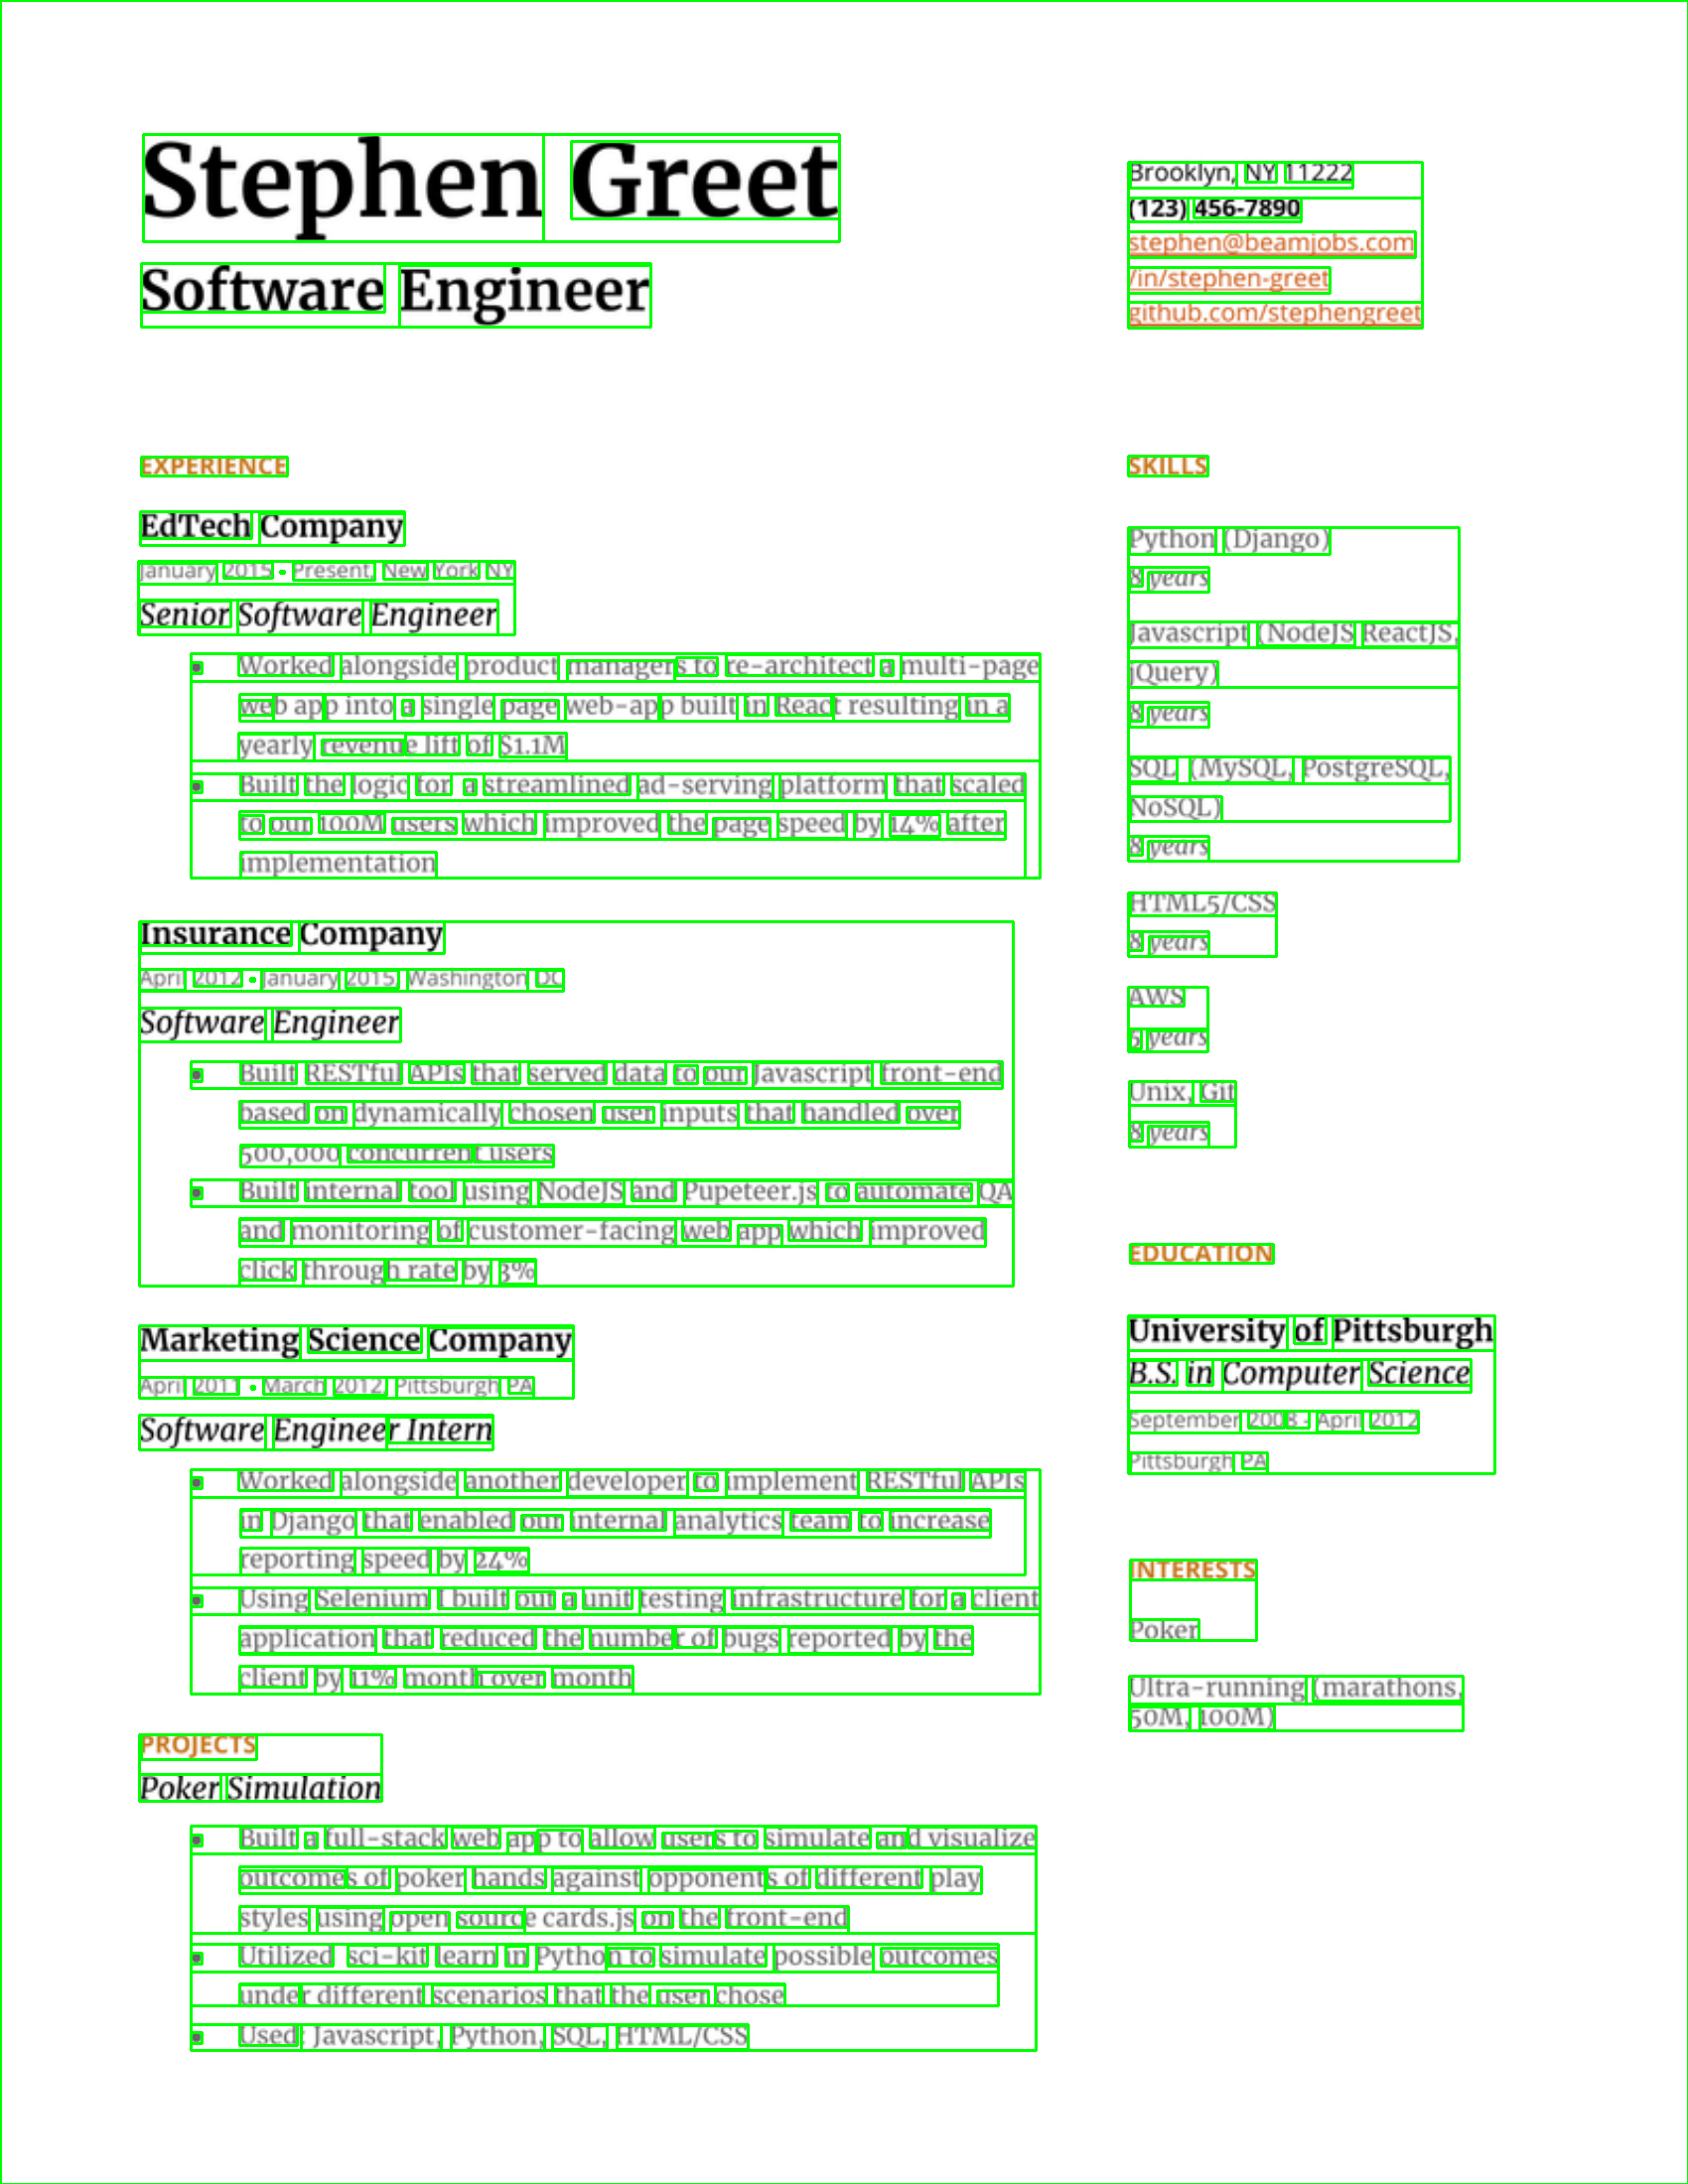

In [40]:
# Draw box on image to visual the result of text reading
# import PIL
# from PIL import ImageDraw
import cv2
from google.colab.patches import cv2_imshow

# def draw_box(pdf_path, df, color='green', width=2):
  # image = convert_from_path(pdf_path, fmt='PNG')[0]
  # draw = ImageDraw.Draw(image)
  # for i in range(len(df)):
  #   (x, y, w, h) = (df['left'][i], df['top'][i], df['width'][i], df['height'][i])
  #   draw.rectangle((x, y, x + w, y + h), fill=color, width=width) 
  # return image

pages = convert_from_path(resume_path)
cv2_img = np.array(pages[0])
# img = cv2.resize(img, None, fx=0.5, fy=0.5)
print(type(img))
# cv2_img = cv2.imread(img)
length = len(resume_text['level'])

for i in range(length):
  d = resume_text
  (x, y, w, h) = (d['left'][i], d['top'][i], d['width'][i], d['height'][i])
  cv2.rectangle(cv2_img, (x, y), (x + w, y + h), (0, 255, 0), 2)


cv2_imshow(cv2_img)

## Clean Resume Text

In [44]:
resumeText = pytesseract. image_to_string(resume_image)

In [46]:
resumeText

'Stephen Greet\n\nSoftware Engineer\n\nEXPERIENCE\n\nEdTech Company\n\nJanuary 2015 - Present, New York NY\nSenior Software Engineer\n\ne Worked alongside product managers to re-architect a multi-page\nweb app into a single page web-app built in React resulting ina\nyearly revenue lift of $1.1M\n\ne Built the logic for a streamlined ad-serving platform that scaled\nto our 100M users which improved the page speed by 14% after\nimplementation\n\nInsurance Company\nApril 2012 - January 2015, Washington DC\nSoftware Engineer\ne Built RESTful APIs that served data to our Javascript front-end\nbased on dynamically chosen user inputs that handled over\n500,000 concurrent users\ne Built internal tool using NodeJS and Pupeteer.js to automate QA\nand monitoring of customer-facing web app which improved\nclick through rate by 3%\n\nMarketing Science Company\nApril 2011 - March 2012, Pittsburgh PA\n\nSoftware Engineer Intern\n\ne Worked alongside another developer to implement RESTful APIs\nin Dja

In [47]:
print(resumeText)

Stephen Greet

Software Engineer

EXPERIENCE

EdTech Company

January 2015 - Present, New York NY
Senior Software Engineer

e Worked alongside product managers to re-architect a multi-page
web app into a single page web-app built in React resulting ina
yearly revenue lift of $1.1M

e Built the logic for a streamlined ad-serving platform that scaled
to our 100M users which improved the page speed by 14% after
implementation

Insurance Company
April 2012 - January 2015, Washington DC
Software Engineer
e Built RESTful APIs that served data to our Javascript front-end
based on dynamically chosen user inputs that handled over
500,000 concurrent users
e Built internal tool using NodeJS and Pupeteer.js to automate QA
and monitoring of customer-facing web app which improved
click through rate by 3%

Marketing Science Company
April 2011 - March 2012, Pittsburgh PA

Software Engineer Intern

e Worked alongside another developer to implement RESTful APIs
in Django that enabled our internal analyt

In [48]:
import re
def clean_function(resumeText):
    resumeText = re.sub('http\S+\s*', ' ', resumeText)  # remove URLs
    resumeText = re.sub('RT|cc', ' ', resumeText)  # remove RT and cc
    resumeText = re.sub('#\S+', '', resumeText)  # remove hashtags
    resumeText = re.sub('@\S+', '  ', resumeText)  # remove mentions
    resumeText = re.sub('[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""), ' ', resumeText)  # remove punctuations
    resumeText = re.sub(r'[^\x00-\x7f]',r' ', resumeText) 
    resumeText = re.sub('\s+', ' ', resumeText)  # remove extra whitespace
    resumeText = re.sub('\n', '', resumeText)  # remove new lines
    return resumeText

In [50]:
clean_result = clean_function(resumeText)
clean_result

'Stephen Greet Software Engineer EXPERIENCE EdTech Company January 2015 Present New York NY Senior Software Engineer e Worked alongside product managers to re architect a multi page web app into a single page web app built in React resulting ina yearly revenue lift of 1 1M e Built the logic for a streamlined ad serving platform that scaled to our 100M users which improved the page speed by 14 after implementation Insurance Company April 2012 January 2015 Washington DC Software Engineer e Built RESTful APIs that served data to our Javascript front end based on dynamically chosen user inputs that handled over 500 000 concurrent users e Built internal tool using NodeJS and Pupeteer js to automate QA and monitoring of customer facing web app which improved click through rate by 3 Marketing Science Company April 2011 March 2012 Pittsburgh PA Software Engineer Intern e Worked alongside another developer to implement RESTful APIs in Django that enabled our internal analytics team to increase 

In [51]:
print(clean_result)

Stephen Greet Software Engineer EXPERIENCE EdTech Company January 2015 Present New York NY Senior Software Engineer e Worked alongside product managers to re architect a multi page web app into a single page web app built in React resulting ina yearly revenue lift of 1 1M e Built the logic for a streamlined ad serving platform that scaled to our 100M users which improved the page speed by 14 after implementation Insurance Company April 2012 January 2015 Washington DC Software Engineer e Built RESTful APIs that served data to our Javascript front end based on dynamically chosen user inputs that handled over 500 000 concurrent users e Built internal tool using NodeJS and Pupeteer js to automate QA and monitoring of customer facing web app which improved click through rate by 3 Marketing Science Company April 2011 March 2012 Pittsburgh PA Software Engineer Intern e Worked alongside another developer to implement RESTful APIs in Django that enabled our internal analytics team to increase r

In [ ]:
# Is our end goal to be train the model that could identify a resume that is which catogries?
# 

In [55]:
import pandas as pd
path = "/content/drive/MyDrive/CISC3440_Project/Resume_CSV/ResumeDataSet.csv"
df = pd.read_csv(path)

In [56]:
df.head()

,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."
